In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
from my_utils import *
import pandas as pd

In [13]:
df = unpickle("scope_measure_statistics_recorder_data/measured_data.pickle")
Q = df["Q"]
delta_t = df["delta_t"]
len(Q)

loading from QFM_compare_to_integral_record_data/QFM_data.pickle


161562

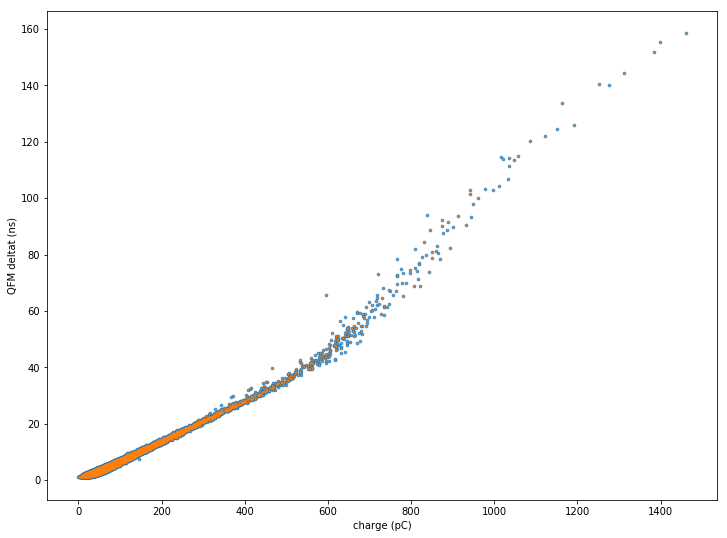

In [14]:
big_figure()
plt.scatter(Q*1e12,delta_t*1e9,s=7,alpha=0.7)
plt.scatter(Q*1e12,delta_t*1e9,s=0.2)
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.show()

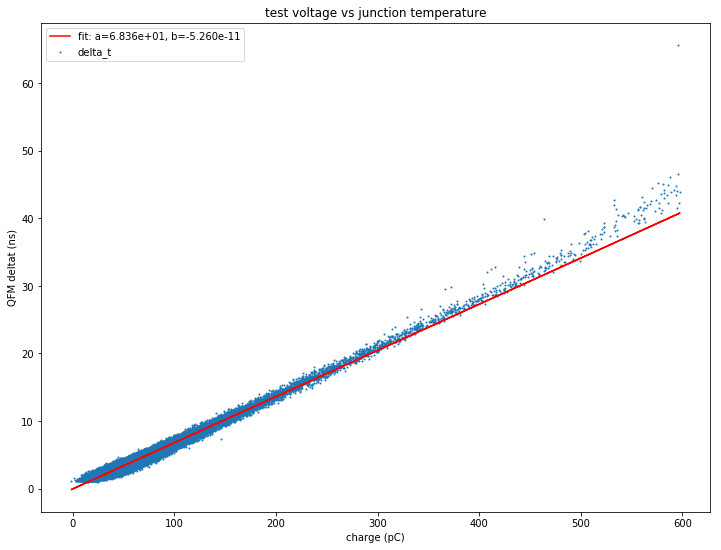

gain = 14.629 pC/ns


In [17]:
from scipy.optimize import curve_fit

# no special delimiter needed for tsv
xdata = Q
ydata = delta_t

mask = xdata < 600e-12

xdata = xdata[mask]
ydata = ydata[mask]

def func(x, a, b):
    return a *x + b

popt, pcov = curve_fit(func, xdata, ydata, p0 = [1,1])

plt.scatter(xdata*1e12,ydata*1e9,s=1)
plt.title("test voltage vs junction temperature")
plt.plot(xdata*1e12, 1e9*func(xdata, *popt), 'r-',
         label='fit: a=%3.3e, b=%3.3e' % tuple(popt))
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.legend()
plt.show()


gain=1/popt[0] # pC/ps
gain_pC_per_ns = 1000*gain
print("gain = {:3.3f} pC/ns".format(gain_pC_per_ns))

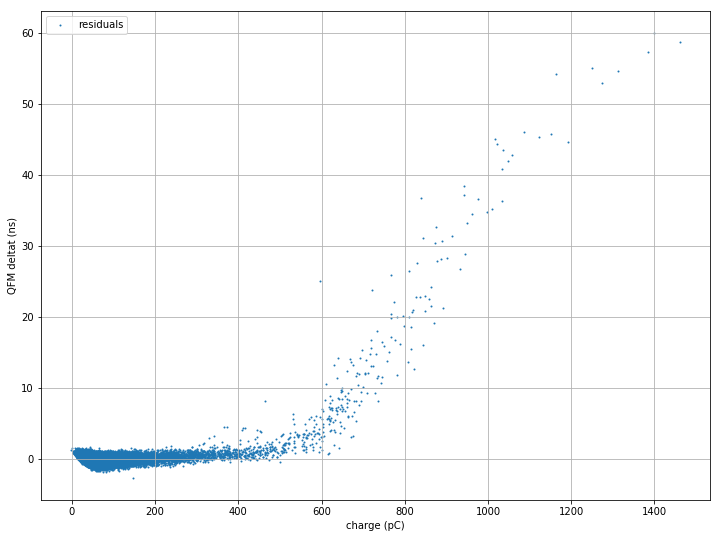

In [19]:
xdata = Q
ydata = delta_t

plt.scatter(xdata*1e12, 1e9*( ydata- func(xdata, *popt) ), s=1,  label='residuals')
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.legend()
plt.grid(True)
plt.show()

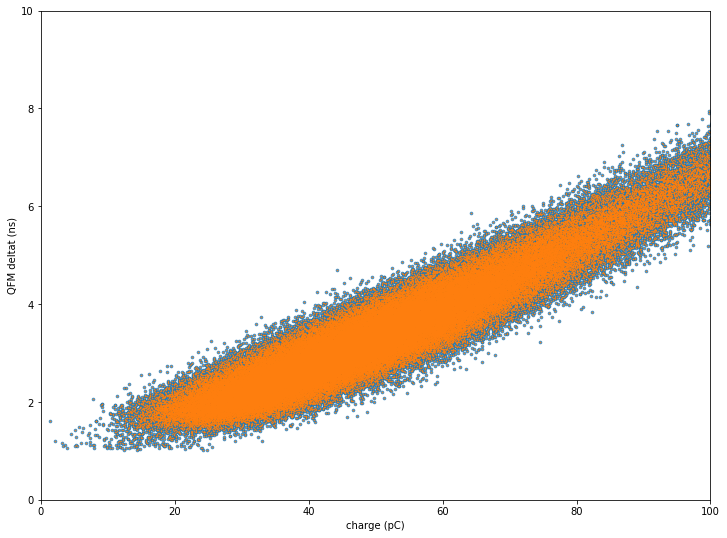

In [21]:
big_figure()
plt.scatter(Q*1e12,delta_t*1e9,s=7,alpha=0.7)
plt.scatter(Q*1e12,delta_t*1e9,s=0.2)
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.xlim(0,100)
plt.ylim(0,10)
plt.show()

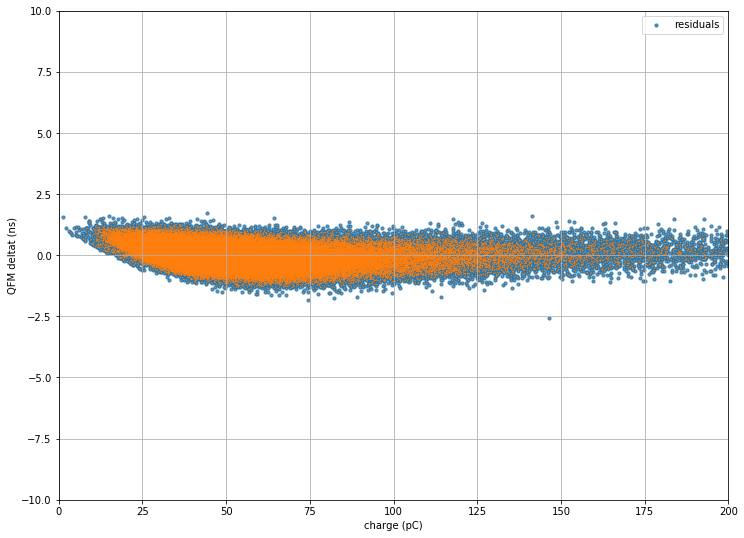

In [27]:

plt.scatter(xdata*1e12, 1e9*( ydata- func(xdata, *popt) ), s=10,  label='residuals',alpha=0.8)
plt.scatter(xdata*1e12, 1e9*( ydata- func(xdata, *popt) ), s=0.1)
plt.xlabel("charge (pC)")
plt.ylabel("QFM deltat (ns)")
plt.legend()
plt.grid(True)
plt.xlim(0,200)
plt.ylim(-10,10)
plt.show()

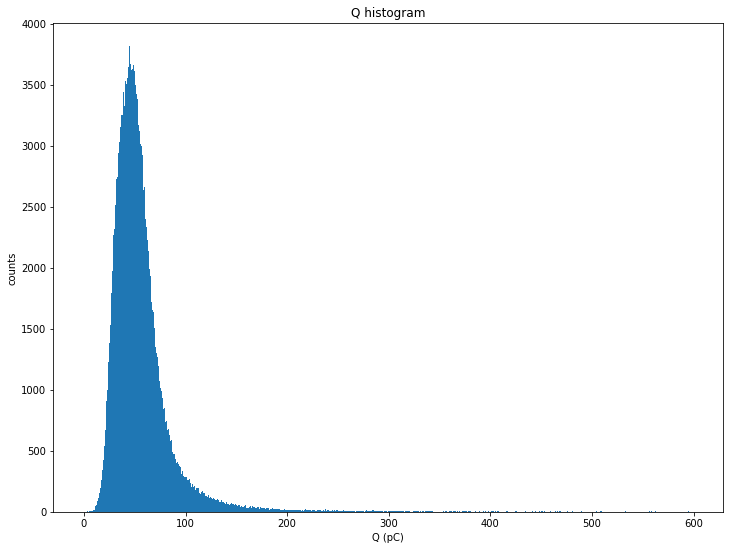

In [22]:
Qbins=np.arange(0,600,1)
plt.hist(Q*1e12,bins=Qbins)
plt.title("Q histogram")
plt.xlabel("Q (pC)")
plt.ylabel("counts")
plt.show()

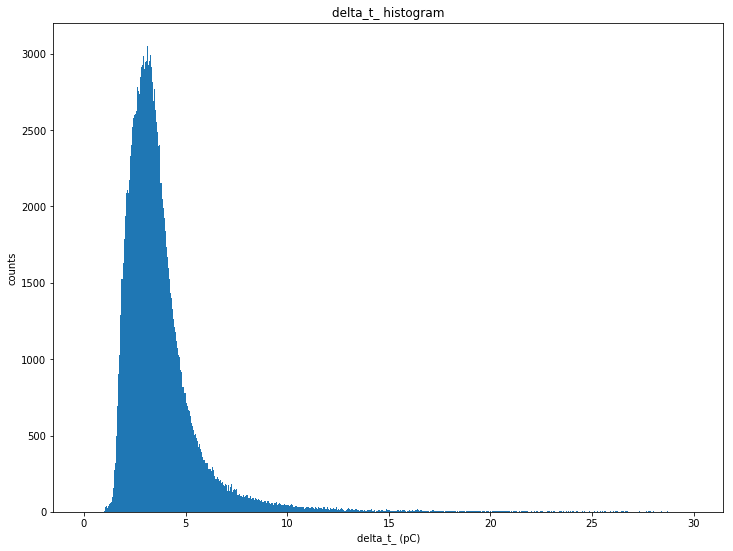

In [24]:
delta_t_bins=np.arange(0,30,0.05)
plt.hist(delta_t*1e9,bins=delta_t_bins)
plt.title("delta_t_ histogram")
plt.xlabel("delta_t_ (pC)")
plt.ylabel("counts")
plt.show()

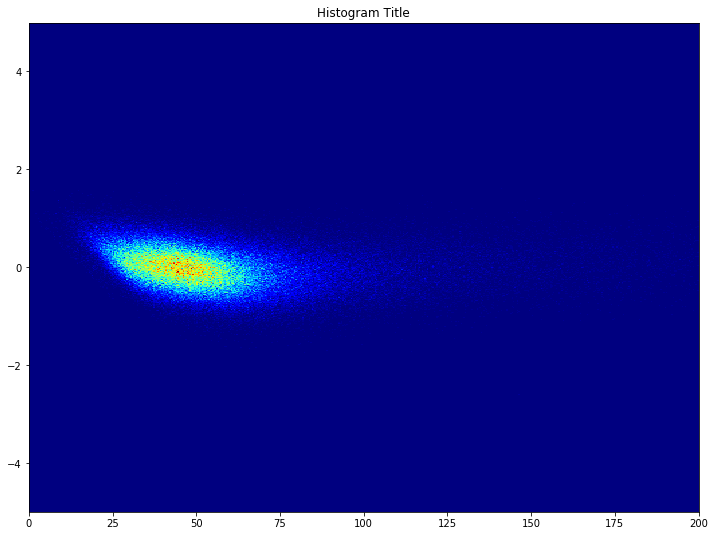

In [31]:

hist2d(xdata*1e12, 1e9*( ydata- func(xdata, *popt) ),
  xedges = np.linspace(0,200,500),
  yedges = np.linspace(-5,5,500)
)
